# Error propagation in an arbitrary multivariate function

We are going to calculate the value and propagated error of an observable $Z$ defined as

\begin{align*}
    Z = f(A, B, C, ...)
\end{align*}

For this particular example, we take 

\begin{align}
    Z(A, B, C, D) = A^2 + B \ln(C/D)
\end{align}

## Import data

The imported table contains symbols '$A$', '$B$', ..., mean values $\bar A, \bar B, ...$ and uncertainties $\alpha_A, \alpha_B$


In [2]:
import pandas as pd
import sympy as sym

parameters = pd.read_csv('parameters_table.csv').set_index('symbol')
parameters


,val,delta
symbol,,
A,1.20,0.10
B,1.30,0.01
C,1.25,0.01
D,1.15,0.05


## define symbols and expressions

define variables as sympy symbols and $Z$ as a sympy expression

In [2]:
A, B, C, D = sym.symbols("A B C D")
Z = A**2 + B*sym.log(C/D)

In [3]:
Z_bar = Z.subs(parameters['val'].items())
Z_bar

1.54839609162077

## partial and total errors

### partial errors 

These are calculated as the variation in $\bar Z$ with respect to each variable as follows

\begin{align*}
    \alpha_Z^A &= Z(\bar A + \alpha_A, \bar B, \bar C, \bar D) - f(\bar A, \bar B, \bar C, \bar D) \\
    &\vdots \\
    \alpha_Z^D &= Z(\bar A, \bar B, \bar C, \bar D + \alpha_D) - f(\bar A, \bar B, \bar C, \bar D)
\end{align*}

In [4]:
parameters

,val,delta
symbol,,
A,1.20,0.10
B,1.30,0.01
C,1.25,0.01
D,1.15,0.05


For a each variable, we calculate an array containing modified arguments. For variable $A$, for instance, the array is called *alpha_A_args* and is calculated according to replacement rules

\begin{align}
    \begin{array}{c}
    A \rightarrow A + \alpha_A  \\
    \vdots \\
    D \rightarrow D
    \end{array}
\end{align}


In [5]:

alpha_A_args = parameters['val'].copy()
alpha_A_args.loc['A'] = alpha_A_args.loc['A'] + parameters['delta']['A']
alpha_A = Z.subs(alpha_A_args.items()) - Z_bar

For all variables

\begin{align*}
    \textit{'A'} &: 
    \begin{pmatrix}
    A \rightarrow A + \alpha_A  \\
    \vdots \\
    D \rightarrow D
    \end{pmatrix} \\
    &\qquad\qquad\vdots \\
\textit{'D'} &: 
\begin{pmatrix}
A \rightarrow A  \\
\vdots \\
D \rightarrow D + \alpha_D
\end{pmatrix}
\end{align*}

In [6]:
mean_vals = parameters['val'].copy()
uncertainties_val = parameters['delta']
alpha_args = {}
for symbol in parameters.index:
    alpha_args[symbol] = mean_vals.copy()
    alpha_args[symbol].loc[symbol] = mean_vals.loc[symbol] + uncertainties_val.loc[symbol]
    
    

Then, the value of $(\alpha_Z^j)^2 = |Z(\text{args}_j) - \bar Z|^2$ where $\text{args}_j$ are the just calculated arrays of modified arguments. For all variables, the values are stored in the array *partial_sq_errors*

In [7]:
from numpy import array as np_array
partial_sq_errors = np_array([abs(Z.subs(variable.items()) - Z_bar)**2 for variable in alpha_args.values()])
total_error = partial_sq_errors.sum()
total_error


0.0656691283861597

In [8]:
#TODO develop a more sofisticated example, with an input as an array of values instead of mean values directly and indirect mid-step measurements
# before procedeing, the above algorithm is going to be implemented methods in a class

In [15]:
# testing Observabfrom scipy.stats import linregress as lnle class
import uncertainties as unc
Z = unc.Observable('parameters_table.csv', 'A**2 + B*log(C/D)')
str(Z)

#TODO before procedeing, error value must be checked


'1.54839609162077 +/- 0.0656691283861597'

## Sofisticated example+

Now, suppose that variables $A$ and $B$ are non directly measurable, and depends on other variables.

\begin{align*}
    A &= A(a_1, a_2) \\
    B &= B(b_1, b_2, b_3, b_4)
\end{align*}

\begin{align*}
    A(a_1, a_2) &= a_1 a_2 \\
    B(b_1, b_2, b_3, b_4) &= b_1 b_2 + b_3 b_4
\end{align*}



In [10]:
a1, a2 = sym.symbols("a1 a2")
b1, b2 = sym.symbols("b1 b2")
A = a1*a2
B = b2/b1

In [17]:
A = unc.Observable('parameters_A.csv', 'a1*a2')
str(A)

'26.0000000000000 +/- 0.00520400000000003'

observable B is to be measured as the slope a linear regression

In [25]:
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np



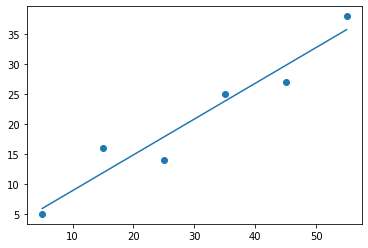

In [38]:
B_pars = pd.read_csv('parameters_B.csv')
x = B_pars['b1'].to_numpy().reshape((-1,1))
y = B_pars['b2'].to_numpy()
model = LinearRegression()
model.fit(x,y)

slope = model.coef_[0]
intercept = model.intercept_
plt.scatter(x,y)
plt.plot(x, x*slope + intercept)

In [58]:
y_pred = model.predict(x)
residuals = y - y_pred
n = y.size
df = n - 2
see = ((residuals**2).sum()/df)**0.5
alpha_B = 2*see**2/(x**2 - n*x.mean()**2).sum()
alpha_B


-0.0009271098538425274

# Experimentos realizados 
1. Calor específico
2. Equivalente mecánica y eléctrica del calor
3. Calibración de termómetros
4. Diferencia de temperatura placa térmica
5. Lentes delgadas y ecuación de Gauss
6. Construcción de un telescopio
7. Ley de Malus
8. Ecuaciones de Fresnel

In [5]:
# TODO sintetizar el objetivo de cada experimento
# TODO derivar de lo anterior, *esquemas de medición*
# variables involucradas; independientes, dependientes; ecuación; error
# estos esquemas de medición dependen las clases que se definirán

# TODO retake this experiments splitting 